#  Water Quality

In aquatic systems, water quality is an important indicator of overall health. Numerous adverse effects can result from poor water quality, both on human health and the surrounding environment. So, this dataset is about water quality metrics and how to classify water potability. We have 3276 samples and 10 features 

X features:

1-ph: pH of 1. water (0 to 14).

2-Hardness: Capacity of water to precipitate soap in mg/L.

3-Solids: Total dissolved solids in ppm.

4-Chloramines: Amount of Chloramines in ppm.

5-Sulfate: Amount of Sulfates dissolved in mg/L.

6-Conductivity: Electrical conductivity of water in μS/cm.

7-Organic_carbon: Amount of organic carbon in ppm.

8-Trihalomethanes: Amount of Trihalomethanes in μg/L.

9-Turbidity: Measure of light emiting property of water in NTU.

Y feature:

10-Potability : Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

The link to the dataset: https://data.world/gymprathap/water-quality-dataset


### Libraries

In [1]:
import numpy as np 
import pandas as pd 
from sklearn import metrics
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score,\
RandomizedSearchCV, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from collections import Counter
import scipy
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve, confusion_matrix,mean_squared_error, r2_score,plot_confusion_matrix,plot_roc_curve
import warnings
warnings.simplefilter(action='ignore', category=Warning)
%matplotlib inline

### Read The File

In [2]:
df = pd.read_csv("water_potability.csv")

In [3]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


#### Make a Copy of Our Dataset

In [4]:
df2=df.copy()

#### Check for missing values

In [5]:
df2.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

<AxesSubplot:>

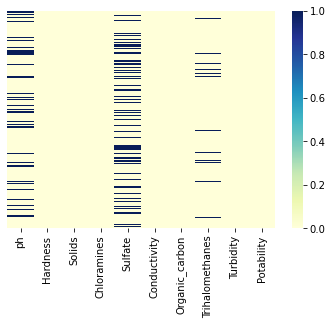

In [6]:
sns.heatmap(df2.isnull(), yticklabels=False,cmap="YlGnBu")

Features ph, Sulfate and Trihalomethanes are having null values.
so, we will replace the Nan values bases on sample median from both classes.

### Fill the Missing Values with Median

#### Filling pH Missing Values

In [7]:
pH_nan_1 = df2.query('Potability == 1')['ph'][df2['ph'].isna()].index
df2.loc[pH_nan_1,'ph'] =df2.query('Potability == 1')['ph'][df2['ph'].notna()].median()

pH_nan_0 = df2.query('Potability == 0')['ph'][df2['ph'].isna()].index
df2.loc[pH_nan_0,'ph'] = df2.query('Potability == 0')['ph'][df2['ph'].notna()].median()

#### Filling Sulfate Missing Values

In [8]:
Sulfate_nan_1 = df2.query('Potability == 1')['Sulfate'][df2['Sulfate'].isna()].index
df2.loc[Sulfate_nan_1,'Sulfate'] =df2.query('Potability == 1')['Sulfate'][df2['Sulfate'].notna()].median()

Sulfate_nan_0 = df2.query('Potability == 0')['Sulfate'][df2['Sulfate'].isna()].index
df2.loc[Sulfate_nan_0,'Sulfate'] = df2.query('Potability == 0')['Sulfate'][df2['Sulfate'].notna()].median()

#### Filling Trihalomethanes Missing Values

In [9]:
Trihalomethanes_nan_1 = df2.query('Potability == 1')['Trihalomethanes'][df2['Trihalomethanes'].isna()].index
df2.loc[Trihalomethanes_nan_1,'Trihalomethanes'] =df2.query('Potability == 1')['Trihalomethanes'][df2['Trihalomethanes'].notna()].median()

Trihalomethanes_nan_0 = df2.query('Potability == 0')['Trihalomethanes'][df2['Trihalomethanes'].isna()].index
df2.loc[Trihalomethanes_nan_0,'Trihalomethanes'] = df2.query('Potability == 0')['Trihalomethanes'][df2['Trihalomethanes'].notna()].median()

#### Count the Null Values After Filling

In [10]:
df2.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

<AxesSubplot:>

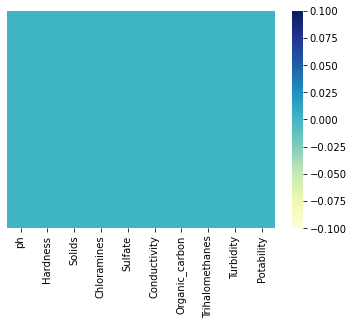

In [11]:
sns.heatmap(df2.isnull(), yticklabels=False,cmap="YlGnBu")

In [12]:
df2

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.035456,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.389426,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.389426,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,331.838167,392.449580,19.903225,66.678214,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,331.838167,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,331.838167,402.883113,11.168946,77.488213,4.708658,1


#### Count the Potable and Non-potable Values

In [13]:
Potability=df2["Potability"].value_counts()
Potability

0    1998
1    1278
Name: Potability, dtype: int64

# skewness

Using pandas skew function to check the correlation between the values.


Values between 0.5 to -0.5 will be considered as the normal distribution else will be skewed depending upon the skewness value.

In [14]:
skew_val = df2.skew().sort_values(ascending=False)
skew_val

Solids             0.621634
Potability         0.450784
Conductivity       0.264490
ph                 0.041520
Organic_carbon     0.025533
Turbidity         -0.007817
Chloramines       -0.012098
Sulfate           -0.022013
Hardness          -0.039342
Trihalomethanes   -0.086968
dtype: float64

#### Checking data density in the dataframe



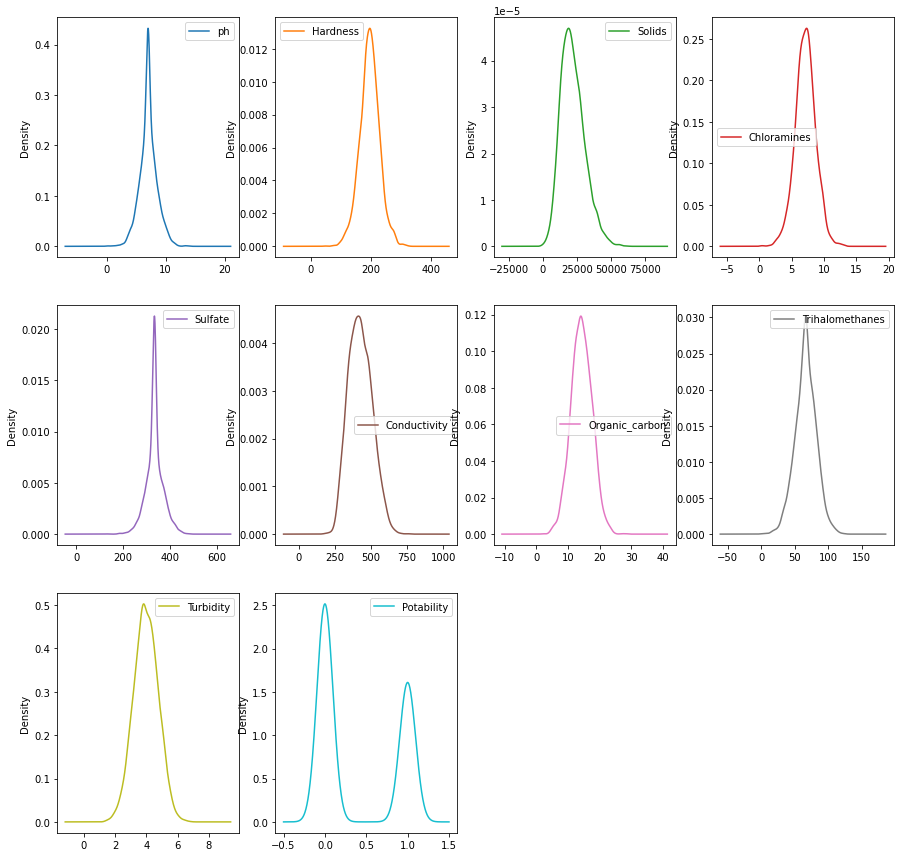

In [15]:
df2.plot(kind = "density",
                layout = (3,4),
                subplots = True,
                figsize = (15,15),
                sharex = False)

plt.show()

Finding any values that contains "ph" equal or smaller than zero.



In [16]:
df2[df2["ph"] <= 0]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3014,0.0,214.846144,49456.587108,7.897539,333.389426,583.448849,7.702328,77.712891,4.92884,0


Drop that value


In [17]:
df2.drop(3014, inplace=True)

### Using the Box Cox transformation to solve the non normal distribuions in the dataframe. . 



A Box Cox transformation is a transformation of a non-normal dependent variables into a normal shape. So the fun part is, box cox can be used in general for all type of distributions and it will by itself find the lambda value (check the formula below to know what lambda here is). Box-Cox cannot be used for negative values and 0.

#### handle Skewed Distribution: Before = Blue ; After = Red.

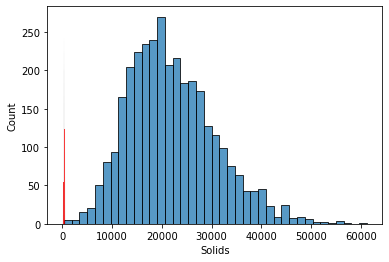

In [18]:
sns.histplot(df2["Solids"])

df2["Solids"], fitted_lambda= scipy.stats.boxcox(df2["Solids"])

sns.histplot(df2["Solids"], color="Red");

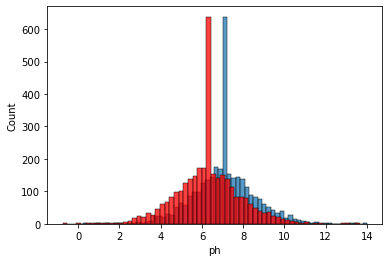

In [19]:
sns.histplot(df2["ph"])

df2["ph"], fitted_lambda= scipy.stats.boxcox(df2["ph"])

sns.histplot(df2["ph"], color="Red");

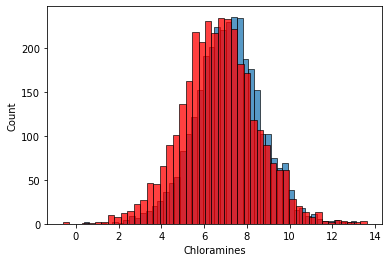

In [20]:
sns.histplot(df2["Chloramines"])

df2["Chloramines"], fitted_lambda= scipy.stats.boxcox(df2["Chloramines"])

sns.histplot(df2["Chloramines"], color="Red");

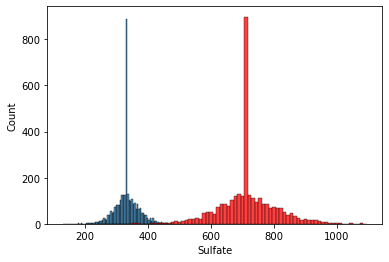

In [21]:
sns.histplot(df2["Sulfate"])

df2["Sulfate"], fitted_lambda= scipy.stats.boxcox(df2["Sulfate"])

sns.histplot(df2["Sulfate"], color="Red");

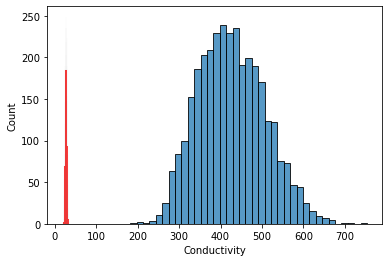

In [22]:
sns.histplot(df2["Conductivity"])

df2["Conductivity"], fitted_lambda= scipy.stats.boxcox(df2["Conductivity"])

sns.histplot(df2["Conductivity"], color="Red");

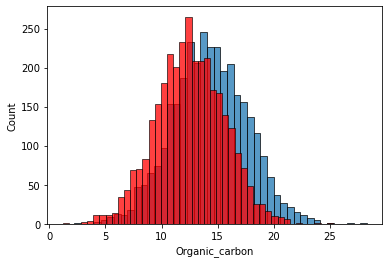

In [23]:
sns.histplot(df2["Organic_carbon"])

df2["Organic_carbon"], fitted_lambda= scipy.stats.boxcox(df2["Organic_carbon"])

sns.histplot(df2["Organic_carbon"], color="Red");

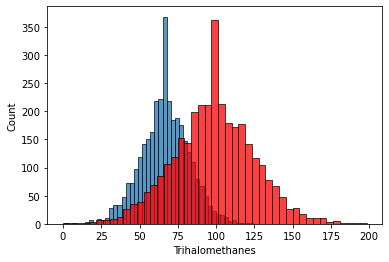

In [24]:
sns.histplot(df2["Trihalomethanes"])

df2["Trihalomethanes"], fitted_lambda= scipy.stats.boxcox(df2["Trihalomethanes"])

sns.histplot(df2["Trihalomethanes"], color="Red");

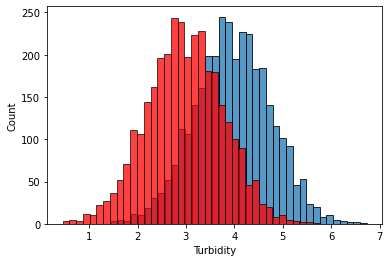

In [25]:
sns.histplot(df2["Turbidity"])

df2["Turbidity"], fitted_lambda= scipy.stats.boxcox(df2["Turbidity"])

sns.histplot(df2["Turbidity"], color="Red");

In [26]:
after_boxcox = df2.skew().sort_values(ascending=False)
after_boxcox

Potability         0.450270
ph                 0.100913
Sulfate            0.077337
Chloramines        0.048618
Trihalomethanes    0.027196
Solids             0.019575
Organic_carbon     0.002507
Turbidity         -0.005292
Conductivity      -0.009432
Hardness          -0.038881
dtype: float64

## Statistical Analysis of the Dataset

In [27]:
df2.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3275.000000,3275.000000,3275.000000,3275.000000,3275.000000,3275.000000,3275.000000,3275.000000,3275.000000,3275.000000
mean,6.289651,196.363854,355.798308,6.668917,717.607044,26.940673,12.520690,98.404463,2.975056,0.390229
std,1.541632,32.883197,77.065614,1.793857,89.881166,2.313827,3.043063,26.234761,0.783841,0.487876
min,-0.761135,47.432000,37.638280,-0.630232,238.251243,18.311307,1.183270,-0.257427,0.450295,0.000000
25%,5.446921,176.847379,303.474062,5.531260,676.019147,25.265854,10.484758,81.845579,2.445693,0.000000
50%,6.242380,196.952875,353.657548,6.664798,716.447770,26.947316,12.469892,98.240058,2.963214,0.000000
75%,7.122667,216.669594,407.248715,7.787838,758.934130,28.601134,14.615406,115.295670,3.510372,1.000000
max,13.649407,323.124000,623.425015,13.623676,1095.426391,34.888811,25.263151,198.471267,5.762669,1.000000


### Pairplot

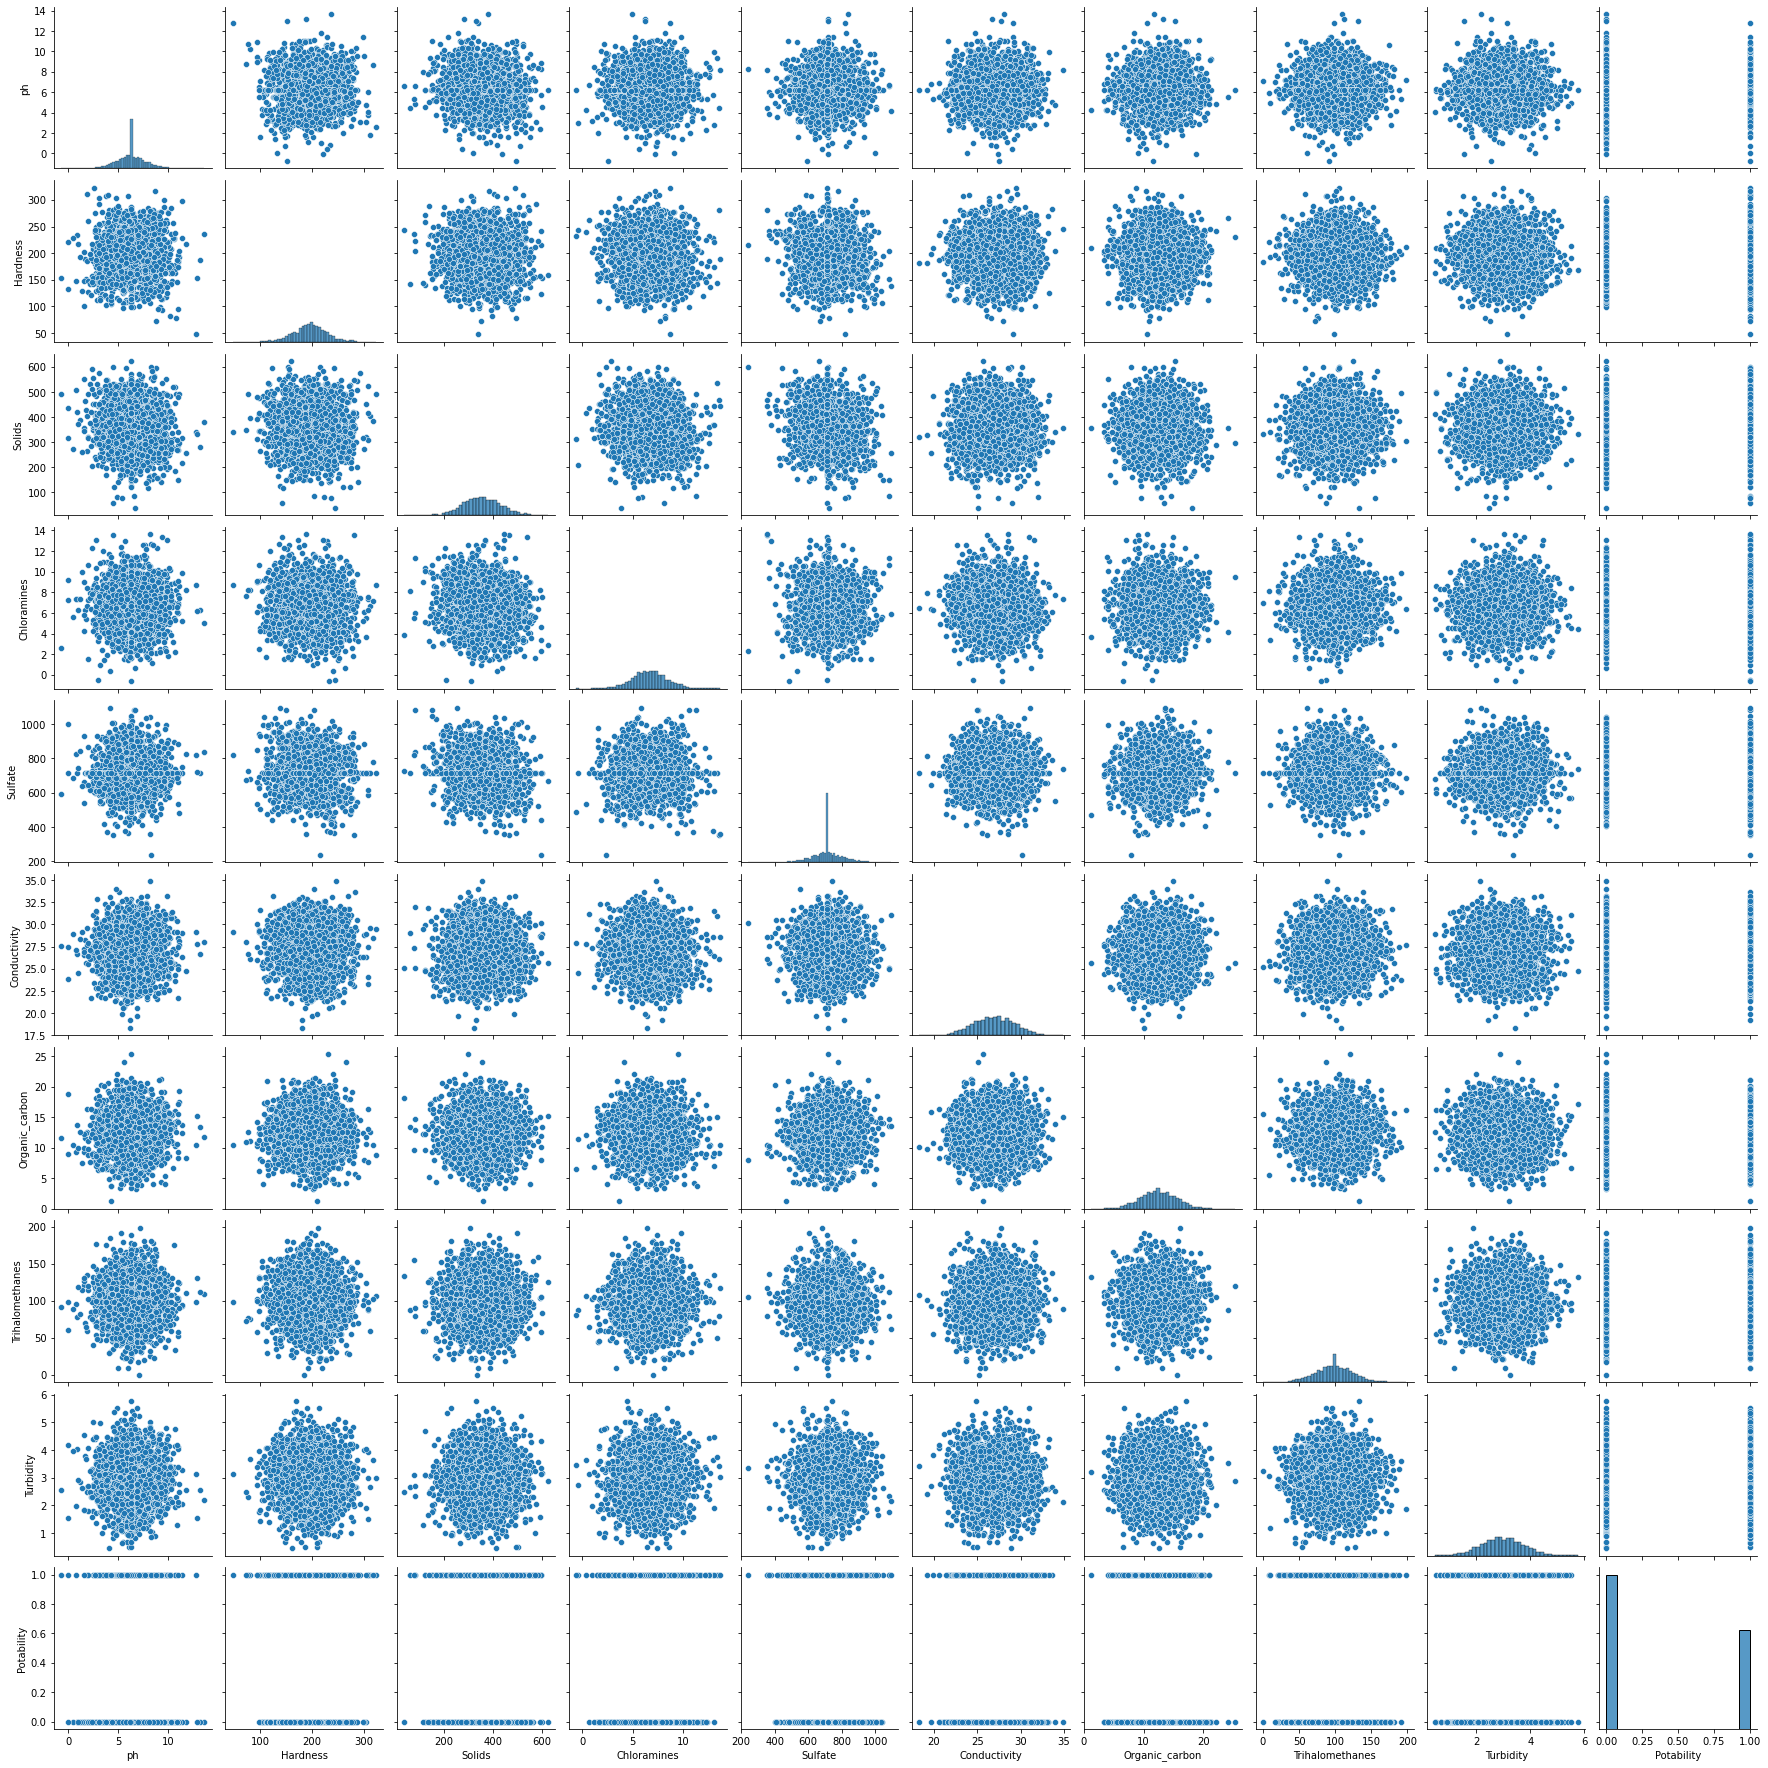

In [28]:
g=sns.pairplot(df2)

### Correlation matrix

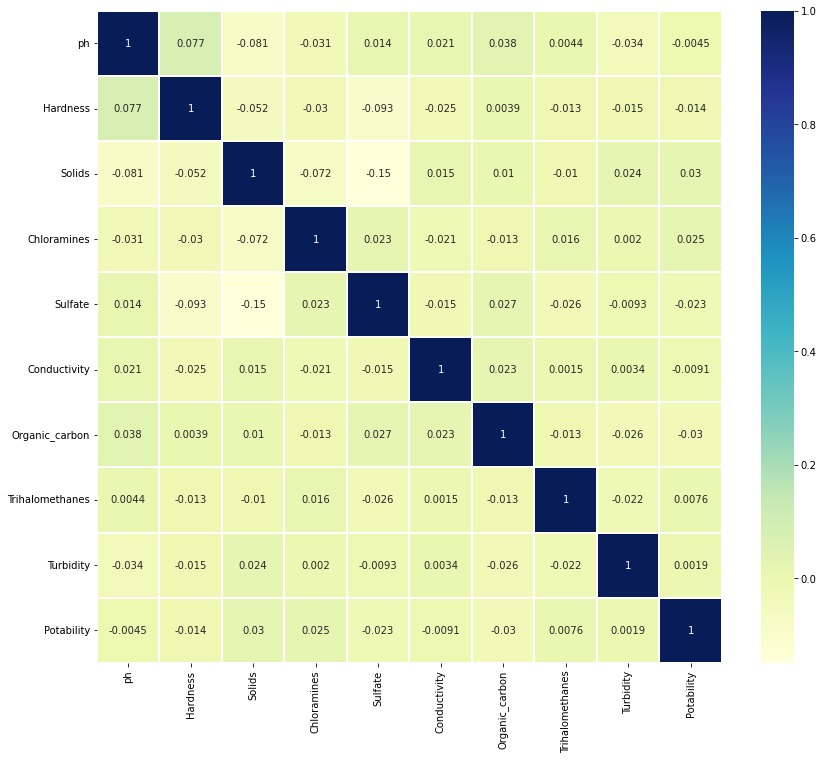

In [29]:
plt.figure(figsize=(14,12))
sns.heatmap(df2.corr(), linewidths=.1, cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

## Train and Test Split

In [30]:
x = df2.drop('Potability',axis=1).values
y = df2['Potability'].values

In [31]:
x_train, x_test, y_train, y_test = train_test_split (x,y, random_state= 10,stratify=y ,test_size = 0.2)

## Normalize tha Data

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

### Before SMOTE

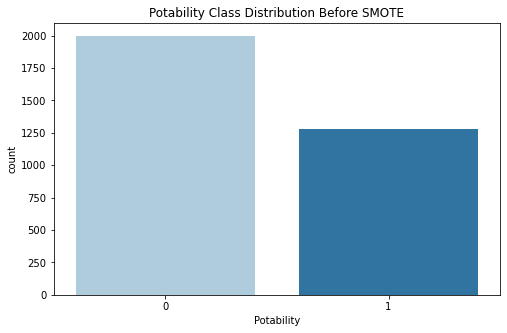

In [33]:
plt.figure(figsize=(8, 5))
plt.title("Potability Class Distribution Before SMOTE")
sns.countplot(x="Potability", data=df2, palette='Paired');

###  SMOTETomek for  Balancing the Data - Oversampling

In [34]:
smote = SMOTETomek(random_state=10)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)
print("X_train shape after smote: {} andn/ y_train shape after smote: {}".format(x_train_smote.shape,y_train_smote.shape))

X_train shape after smote: (2998, 9) andn/ y_train shape after smote: (2998,)


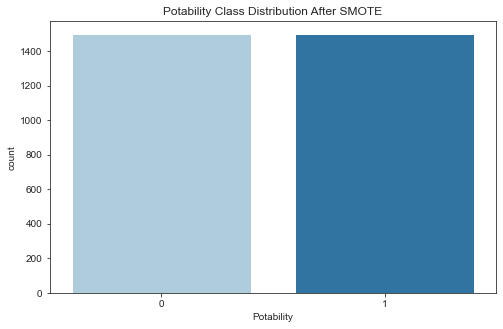

In [35]:
y_dist= pd.DataFrame(data=y_train_smote, index=range(y_train_smote.shape[0]),columns=["Potability"])
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
plt.figure(figsize=(8, 5))
plt.title("Potability Class Distribution After SMOTE")
sns.countplot(x="Potability", data=y_dist, palette='Paired');

# Feature selection

#### After Feature Selection 

In [36]:
c = df2.drop(['Potability','Hardness','Solids','Chloramines','Conductivity','Organic_carbon','Trihalomethanes','Turbidity'],axis=1)
x=c.values
y = df2['Potability'].values

In [37]:
X_train_FS, X_test_FS, Y_train_FS, Y_test_FS = train_test_split (x,y, random_state= 10,stratify=y ,test_size = 0.2)

### SMOTE After Feature Selection

In [38]:
smote = SMOTETomek(random_state=10)
x_train_smote_fs, y_train_smote_fs = smote.fit_resample(X_train_FS, Y_train_FS)
print("X_train shape after smote: {} andn/ y_train shape after smote: {}".format(x_train_smote_fs.shape,y_train_smote_fs.shape))

X_train shape after smote: (2706, 2) andn/ y_train shape after smote: (2706,)


# First Algorithm: Random Forest

#### Optimization stage: Grid Search for Random Forest

In [42]:
rf = RandomForestClassifier()

params_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
   'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_rf = GridSearchCV( rf, param_grid = params_rf, cv = 10,  verbose = 3)
grid_rf.fit(x_train, y_train)

Fitting 10 folds for each of 162 candidates, totalling 1620 fits
[CV 1/10] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.821 total time=   0.2s
[CV 2/10] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.782 total time=   0.2s
[CV 3/10] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.779 total time=   0.2s
[CV 4/10] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.790 total time=   0.2s
[CV 5/10] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.798 total time=   0.2s
[CV 6/10] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.779 total time=   0.2s
[CV 7/10] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimator

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200]},
             verbose=3)

#### To See the Best Parameter 

In [43]:
grid_rf.best_params_

{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 200}

#### To See the Best Score 

In [47]:
grid_rf.best_score_

0.7946564885496182

### RandomForest

Random Forest Confusion Matrix


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

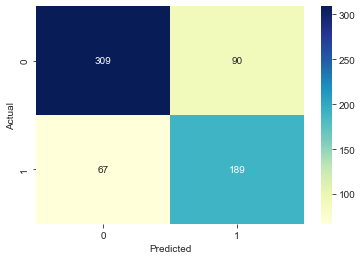

In [39]:
rf1 = RandomForestClassifier(
max_depth= 10,
max_features= 'auto',
min_samples_leaf= 4,
min_samples_split= 5,
n_estimators= 200)

rf1.fit(x_train_smote,y_train_smote)

y_pred=rf1.predict(x_test)
print('Random Forest Confusion Matrix')
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, cmap="YlGnBu" ,fmt='g')

### Performance Measurement for RandomForest

In [40]:
print('Performance Measurement for RandomForest')
print('Training Accuracy:',(rf1.score(x_train_smote, y_train_smote)))
print('Testing Accuracy: ', accuracy_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('F1-Score: ', f1_score(y_test, y_pred))
#for the final plot
RF_Acc=round((accuracy_score(y_test,y_pred)*100),2)

Performance Measurement for RandomForest
Training Accuracy: 0.9419613075383589
Testing Accuracy:  0.7603053435114504
Recall:  0.73828125
Precision:  0.6774193548387096
F1-Score:  0.7065420560747664


### Performance Measurement for RandomForest After features selection

Performance Measurement for RandomForest after features selection
Training Accuracy: 0.8817442719881744
Testing Accuracy:  0.751145038167939
Recall:  0.765625
Precision:  0.6555183946488294
F1-Score:  0.7063063063063063


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

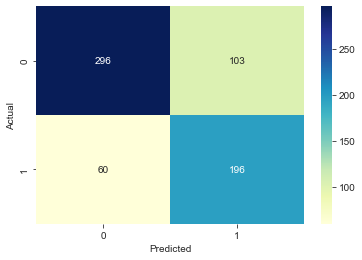

In [41]:
# Rebuild your model using only the best 5 features
rf1.fit(x_train_smote_fs, y_train_smote_fs)
y_pred=rf1.predict(X_test_FS)
print('Performance Measurement for RandomForest after features selection')
print('Training Accuracy:',(rf1.score(x_train_smote_fs, y_train_smote_fs)))
print('Testing Accuracy: ', accuracy_score(Y_test_FS, y_pred))
print('Recall: ', recall_score(Y_test_FS, y_pred))
print('Precision: ', precision_score(Y_test_FS, y_pred))
print('F1-Score: ', f1_score(Y_test_FS, y_pred))
RF_Acc_fs=round((accuracy_score(Y_test_FS, y_pred)*100),2)


confusion_matrix = pd.crosstab(Y_test_FS, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, cmap="YlGnBu" ,fmt='g')

# Second Algorithm: Gradient Boosting 

#### Optimization stage: Grid Search for Gradient Boosting

In [51]:
gb= GradientBoostingClassifier()

para_gb = {
 'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 1],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
   'max_features': ['auto', 'sqrt', 'log2']
}  
grid_gb = GridSearchCV(estimator=gb, param_grid=para_gb, cv=10, verbose=3) 
grid_gb.fit(x_train, y_train)

Fitting 10 folds for each of 486 candidates, totalling 4860 fits
[CV 1/10] END learning_rate=0.01, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.706 total time=   0.2s
[CV 2/10] END learning_rate=0.01, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.687 total time=   0.2s
[CV 3/10] END learning_rate=0.01, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.695 total time=   0.2s
[CV 4/10] END learning_rate=0.01, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.691 total time=   0.2s
[CV 5/10] END learning_rate=0.01, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.710 total time=   0.3s
[CV 6/10] END learning_rate=0.01, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.683 total time=   0.2s

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [3, 5, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200]},
             verbose=3)

#### To See the Best Parameter 


In [52]:
grid_gb.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 100}

#### To See the Best Score 

In [53]:
grid_gb.best_score_

0.7938931297709924

### Gradient Boosting

Gradient Boosting Confusion Matrix


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

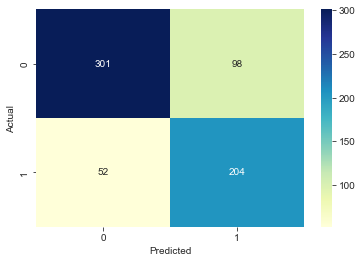

In [42]:
gb2= GradientBoostingClassifier(learning_rate= 0.1,
 max_depth= 3,
 max_features= 'auto',
 min_samples_leaf= 2,
 min_samples_split= 5,
 n_estimators= 100)


gb2.fit(x_train_smote,y_train_smote)

y_pred=gb2.predict(x_test)
print('Gradient Boosting Confusion Matrix')
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, cmap="YlGnBu" ,fmt='g')


### Performance Measurement for Gradient Boosting

In [43]:
print('Performance Measurement for Gradient Boosting')
print('Training Accuracy:',(gb2.score(x_train_smote, y_train_smote)))
print('Testing Accuracy: ', accuracy_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('F1-Score: ', f1_score(y_test, y_pred))
#for the final plot
GB_Acc=round((accuracy_score(y_test,y_pred)*100),2)

Performance Measurement for Gradient Boosting
Training Accuracy: 0.8532354903268846
Testing Accuracy:  0.7709923664122137
Recall:  0.796875
Precision:  0.6754966887417219
F1-Score:  0.7311827956989249


### Performance Measurement for Gradient Boosting After features selection

Performance Measurement for Gradient Boosting after features selection
Training Accuracy: 0.8167036215816703
Testing Accuracy:  0.7557251908396947
Recall:  0.7734375
Precision:  0.66
F1-Score:  0.7122302158273381


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

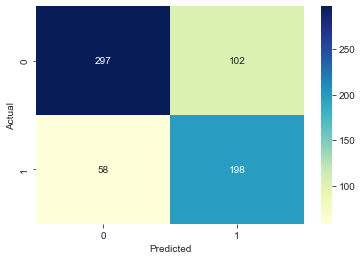

In [44]:
# Rebuild your model using only the best 5 features
gb2.fit(x_train_smote_fs, y_train_smote_fs)
y_pred=gb2.predict(X_test_FS)
print('Performance Measurement for Gradient Boosting after features selection')
print('Training Accuracy:',(gb2.score(x_train_smote_fs, y_train_smote_fs)))
print('Testing Accuracy: ', accuracy_score(Y_test_FS, y_pred))
print('Recall: ', recall_score(Y_test_FS, y_pred))
print('Precision: ', precision_score(Y_test_FS, y_pred))
print('F1-Score: ', f1_score(Y_test_FS, y_pred))
GB_Acc_fs=round((accuracy_score(Y_test_FS, y_pred)*100),2)


confusion_matrix = pd.crosstab(Y_test_FS, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, cmap="YlGnBu" ,fmt='g')

# Third Algorithm: Support Vector Machine (SVM)

#### Optimization stage: Grid Search for SVM

In [59]:
svm= SVC()
para_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'] + [0.1, 1, 10],
    'degree': [1,2, 3, 4],
    'coef0': [ 0.5, 1.0]
}  
grid_svm = GridSearchCV(svm, param_grid=para_svm, cv=10,  verbose=3) #search svm
grid_svm.fit(x_train, y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits
[CV 1/10] END C=0.1, coef0=0.5, degree=1, gamma=scale, kernel=linear;, score=0.607 total time=   0.1s
[CV 2/10] END C=0.1, coef0=0.5, degree=1, gamma=scale, kernel=linear;, score=0.607 total time=   0.1s
[CV 3/10] END C=0.1, coef0=0.5, degree=1, gamma=scale, kernel=linear;, score=0.611 total time=   0.1s
[CV 4/10] END C=0.1, coef0=0.5, degree=1, gamma=scale, kernel=linear;, score=0.611 total time=   0.1s
[CV 5/10] END C=0.1, coef0=0.5, degree=1, gamma=scale, kernel=linear;, score=0.611 total time=   0.0s
[CV 6/10] END C=0.1, coef0=0.5, degree=1, gamma=scale, kernel=linear;, score=0.611 total time=   0.1s
[CV 7/10] END C=0.1, coef0=0.5, degree=1, gamma=scale, kernel=linear;, score=0.611 total time=   0.0s
[CV 8/10] END C=0.1, coef0=0.5, degree=1, gamma=scale, kernel=linear;, score=0.611 total time=   0.1s
[CV 9/10] END C=0.1, coef0=0.5, degree=1, gamma=scale, kernel=linear;, score=0.611 total time=   0.1s
[CV 10/10] END C=

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'coef0': [0.5, 1.0],
                         'degree': [1, 2, 3, 4],
                         'gamma': ['scale', 'auto', 0.1, 1, 10],
                         'kernel': ['linear', 'rbf']},
             verbose=3)

#### To See the Best Parameter 


In [60]:
grid_svm.best_params_

{'C': 1, 'coef0': 0.5, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}

#### To See the Best Score 


In [61]:
grid_svm.best_score_

0.6755725190839694

### SVM

SVM Confusion Matrix


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

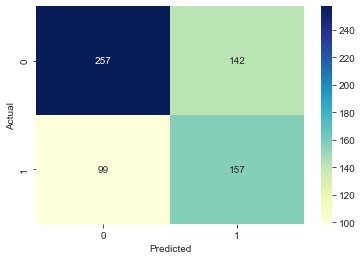

In [45]:
svm2= SVC(C=1, coef0=0.5, degree=1, gamma=0.1, kernel='rbf')

svm2.fit(x_train_smote,y_train_smote)

y_pred=svm2.predict(x_test)
print('SVM Confusion Matrix')
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, cmap="YlGnBu" ,fmt='g')

### Performance Measurement for SVM

In [46]:
print('Performance Measurement for SVM')
print('Training Accuracy:',(svm2.score(x_train_smote, y_train_smote)))
print('Testing Accuracy: ', accuracy_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('F1-Score: ', f1_score(y_test, y_pred))
#for the final plot
SVM_Acc=round((accuracy_score(y_test,y_pred)*100),2)

Performance Measurement for SVM
Training Accuracy: 0.7528352234823216
Testing Accuracy:  0.6320610687022901
Recall:  0.61328125
Precision:  0.5250836120401338
F1-Score:  0.5657657657657658


### Performance Measurement for SVM After features selection

Performance Measurement for SVM after features selection
Training Accuracy: 0.8207686622320769
Testing Accuracy:  0.6702290076335878
Recall:  0.640625
Precision:  0.5694444444444444
F1-Score:  0.6029411764705882


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

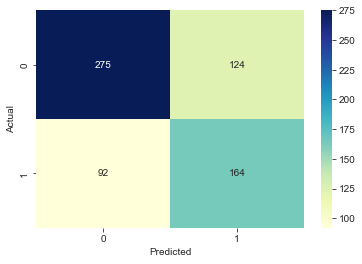

In [47]:
# Rebuild your model using only the best 5 features
svm2.fit(x_train_smote_fs, y_train_smote_fs)
y_pred=svm2.predict(X_test_FS)
print('Performance Measurement for SVM after features selection')
print('Training Accuracy:',(svm2.score(x_train_smote_fs, y_train_smote_fs)))
print('Testing Accuracy: ', accuracy_score(Y_test_FS, y_pred))
print('Recall: ', recall_score(Y_test_FS, y_pred))
print('Precision: ', precision_score(Y_test_FS, y_pred))
print('F1-Score: ', f1_score(Y_test_FS, y_pred))
SVM_Acc_fs=round((accuracy_score(Y_test_FS, y_pred)*100),2)


confusion_matrix = pd.crosstab(Y_test_FS, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, cmap="YlGnBu" ,fmt='g')

### Embedded Method for Feature Selection

In [48]:
x = df2.drop('Potability',axis=1)
y = df2['Potability']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

In [49]:
rf=RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred=rf.predict(x_test)

<AxesSubplot:xlabel='Features', ylabel='Importances'>

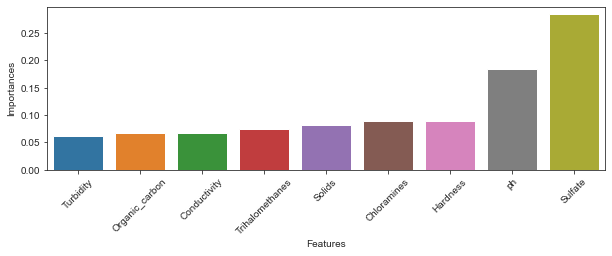

In [50]:

# get the importance of the resulting features.
importances = rf.feature_importances_

# create a data frame for visualization.
final_df = pd.DataFrame({"Features": x_train.columns, "Importances":importances})
final_df.set_index('Importances')

# sort in ascending order to better visualization.
final_df = final_df.sort_values('Importances')

# plot the feature importances in bars.
plt.figure(figsize=(10,3))
plt.xticks(rotation=45)
sns.barplot(x="Features",y= "Importances", data=final_df)

### Classifier comparison

#### Accuracy for all classifiers

Text(0, 0.5, 'Accuracy')

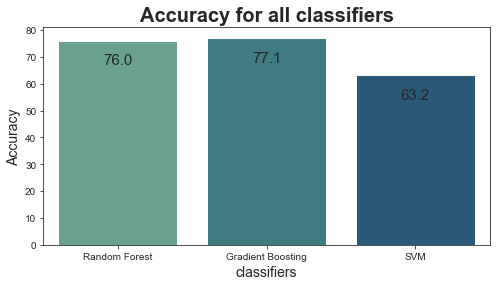

In [51]:
all_accuracy = [RF_Acc,GB_Acc,SVM_Acc]
algo = ['Random Forest', 'Gradient Boosting', 'SVM']

# define dictionary
inter_dict ={'classifiers':algo,
            'Accuracy':all_accuracy}
#create DataFrame from dictionary
df_acc = pd.DataFrame(inter_dict)

#Lets check the Target features first
fig = plt.figure(figsize=(8,4))
ax=sns.barplot(data=df_acc, x='classifiers', y = 'Accuracy',palette="crest")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, -20), 
                   textcoords = 'offset points', size=15)

plt.title("Accuracy for all classifiers", size=20, weight='bold')
plt.xlabel("classifiers", size=14)
plt.ylabel("Accuracy", size=14)


#### Accuracy for all classifiers After Features Selection

Text(0, 0.5, 'Accuracy')

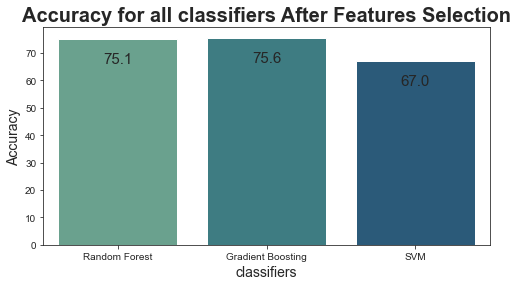

In [52]:
all_accuracy_fs = [RF_Acc_fs,GB_Acc_fs,SVM_Acc_fs]
algo = ['Random Forest', 'Gradient Boosting', 'SVM']

# define dictionary
inter_dict ={'classifiers':algo,
            'Accuracy':all_accuracy_fs}
#create DataFrame from dictionary
df_acc = pd.DataFrame(inter_dict)

#Lets check the Target features first
fig = plt.figure(figsize=(8,4))
ax=sns.barplot(data=df_acc, x='classifiers', y = 'Accuracy',palette="crest")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, -20), 
                   textcoords = 'offset points', size=15)

plt.title("Accuracy for all classifiers After Features Selection", size=20, weight='bold')
plt.xlabel("classifiers", size=14)
plt.ylabel("Accuracy", size=14)
